# Цыпаев Владимир Николаевич

# Лабораторная работа №1

# 11 вариант

# РИМ-181228

1) Импорт библиотек

In [1]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import h5py
from scipy.stats import skew 
from scipy.stats import kurtosis
%matplotlib inline

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2) Создание временного ряда

In [2]:
X = rand.randn(10000)

3) Создание ряда временных отсчетов

In [3]:
t = np.linspace(3, 5, num = 10000)

4) Построение времененного ряда на заданной временной сетке

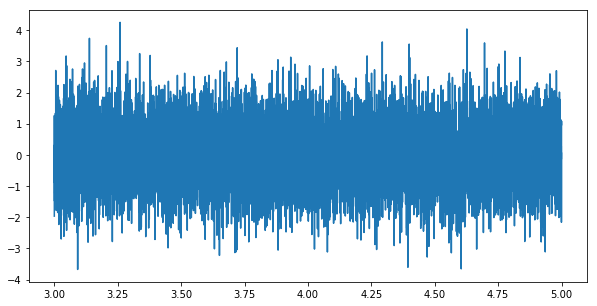

In [4]:
plt.figure(figsize = (10, 5))
plt.plot(t, X)

5-6) Найти мат. ожидание временного ряда

In [5]:
M = np.mean(X)

In [6]:
def mean(X): 
    return sum(X) / len(X)

In [7]:
print(M)
print(mean(X))

-0.0016341395265234166
-0.0016341395265234468


7) Найти дисперсию временного ряда

In [8]:
D = np.var(X)

In [9]:
def varience(X):
    return (1 / (len(X)-1)) * sum((X-M)**2)

In [10]:
print(D)
print(varience(X))

1.0025469858209735
1.0026472505460244


8) Нахождение ассимметрии временного ряда

In [11]:
A = skew(X)

In [12]:
def skewFunc(X):
    M = mean(X)
    D = varience(X)
    return np.mean((X-M)**3) / D**(3/2)

In [13]:
print(A)
print(skewFunc(X))

0.027913886412748026
0.02790969943446507


9) Нахождение эксцесса временного ряда

In [14]:
K = kurtosis(X ,fisher = False)

In [15]:
def kurtosisFunc(X):
    M = mean(X)
    D = varience(X)
    return np.mean((X-M)**4) / (D**2)

In [16]:
print(K)
print(kurtosisFunc(X))

3.0160367420988705
3.0154335649108397


10) Построение оценки выборочной автокорреляции

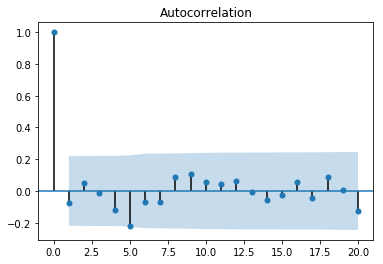

In [17]:
corr_function = plot_acf(X[0:80], lags = 20)

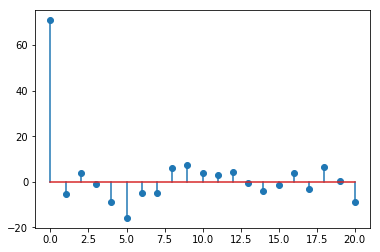

In [18]:
corr_numpy = np.correlate(X[0:80], X[0:80], mode=2)
plt.stem(corr_numpy[79:100])
plt.show()

In [19]:
def corrFunc(X, lags = 0):
    corr = np.ndarray(lags + 1)
    corr[0] = 1
    X1 = X[0:lags*4] # l <= N/4
    for l in range(1,lags + 1):
        corr[l] = (((len(X1)- l) * sum(X1[:-l] * X1[l:]) - sum(X1[:-l])*sum(X1[l:])) / 
                (((len(X1)-l)*sum(X1[:-l]**2) - sum(X1[:-l])**2)**(1/2) *
                 ((len(X1)-l)*sum(X1[l:]**2) - sum(X1[:-l])**2)**(1/2)))
    plt.stem(corr)
    plt.title(f'Корреляция при лаге {lags}')
    plt.show()

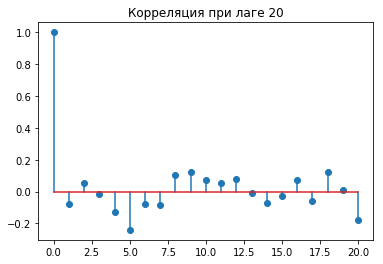

In [20]:
corr_custom = corrFunc(X, 20)

In [21]:
def analyse_time_series(X, p = False):
    t = np.linspace(3, 5, X.size)
    plt.plot(t, X)
    plt.title('Исходная функция')
    plt.show()
    M = mean(X)
    D = varience(X)
    A = skewFunc(X)
    E = kurtosisFunc(X)
    print(f'Мат. ожидание: {M}')
    print(f'Дисперсия: {D}')
    print(f'Ассимметрия: {A}')
    print(f'Эксцесс: {E}')
    corrFunc(X, 20)
    if not p:
        return M, D, A, E

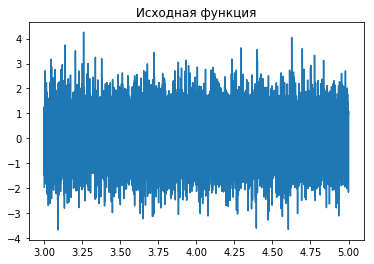

Мат. ожидание: -0.0016341395265234468
Дисперсия: 1.0026472505460244
Ассимметрия: 0.02790969943446507
Эксцесс: 3.0154335649108397


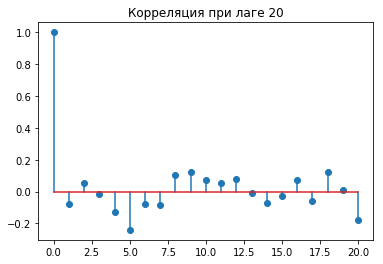

(-0.0016341395265234468,
 1.0026472505460244,
 0.02790969943446507,
 3.0154335649108397)

In [22]:
analyse_time_series(X)

In [23]:
variant = 11
fileName = f'{variant}.mat'
columnName = f'z{variant}'

Xmat = h5py.File(fileName, 'r')
Xmat = Xmat.get(columnName)
Xmat = np.array(Xmat)

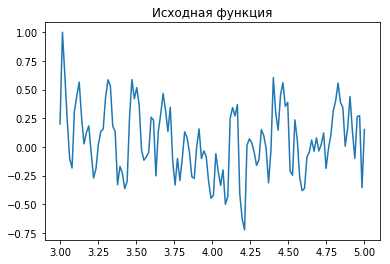

Мат. ожидание: [0.05594982]
Дисперсия: [0.09399218]
Ассимметрия: [0.10593314]
Эксцесс: [2.63398256]


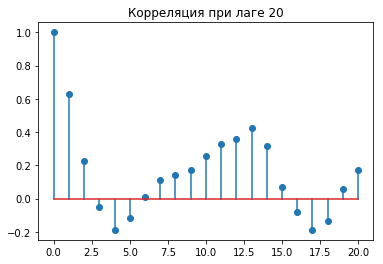

In [24]:
analyse_time_series(Xmat, p=True)